# 3.4. Jakość podziału: MAE

Metryka **Mean Squared Error** nie jest jedyną rozpatrywaną w procesie pomiaru jakości modeli regresji. Podobnie rzecz ma się do pomiaru jakości podziału. **Mean Absolute Error** jest stosowany równie często:

$$ MAE = \frac{ \sum_{i=0}^{N}{ | \overline{y_{i}} - y_{i} | } }{ N } $$

Pozwala ona określić jaka jest średnia odległość wartości zwracanych przez nasz system do wartości oczekiwanych. Przez wykorzystanie wartości absolutnych, **MAE** zwraca nie zwraca już tak dużej uwagi na tzw. *outlierów*.

In [1]:
import pandas as pd
import numpy as np

In [2]:
price = np.linspace(14, 30, 15)
income = [0.0,
          22.270210334494614,
          61.5656001620554,
          76.31767626268956,
          139.84489205505548,
          196.65351459100881,
          263.50293653807745,
          265.9914199145693,
          237.01894881636946,
          173.14474251125418,
          121.16183867125716,
          60.498814563088466,
          26.97578198428058,
          3.5312918245180143,
          4.932649288597467]

prices_df = pd.DataFrame({
    "price": price,
    "income": income
})

<Axes: xlabel='price', ylabel='income'>

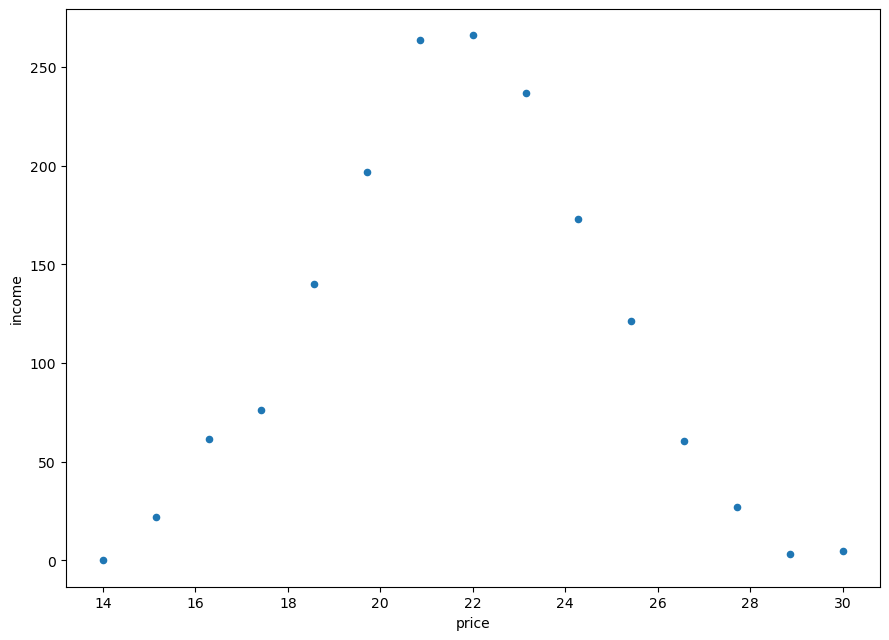

In [3]:
prices_df.plot.scatter(x="price", y="income", 
                       figsize=(10.5, 7.5))

In [6]:
thresholds = prices_df["price"] \
    .rolling(2) \
    .mean()
thresholds

0           NaN
1     14.571429
2     15.714286
3     16.857143
4     18.000000
5     19.142857
6     20.285714
7     21.428571
8     22.571429
9     23.714286
10    24.857143
11    26.000000
12    27.142857
13    28.285714
14    29.428571
Name: price, dtype: float64

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

<Axes: xlabel='threshold'>

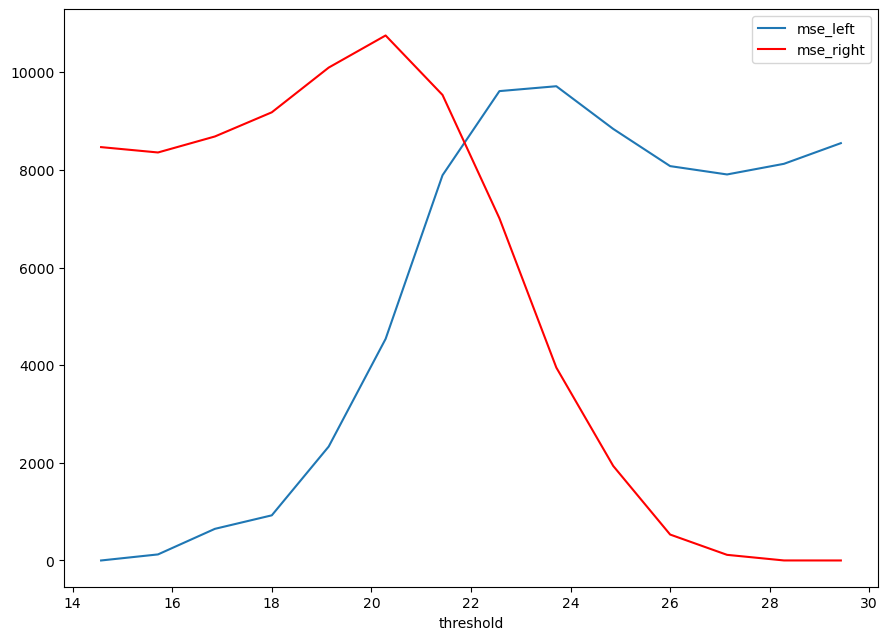

In [9]:
values = []
for threshold in thresholds.dropna():
    df_left = prices_df[prices_df["price"] <= threshold]
    df_right = prices_df[prices_df["price"] > threshold]
    target_left = np.full_like(df_left["income"], 
                               np.mean(df_left["income"]))
    mse_left = mean_squared_error(df_left["income"], 
                                  target_left)
    mae_left = mean_absolute_error(df_left["income"], 
                                   target_left)
    target_right = np.full_like(df_right["income"], 
                                np.mean(df_right["income"]))
    mse_right = mean_squared_error(df_right["income"], 
                                   target_right)
    mae_right = mean_absolute_error(df_right["income"], 
                                    target_right)
    values.append([threshold, 
                   df_left.shape[0], df_right.shape[0],
                   mse_left, mse_right, 
                   mae_left, mae_right])
mse_df = pd.DataFrame(values, columns=("threshold",
                                       "n_left", "n_right",
                                       "mse_left", "mse_right",
                                       "mae_left", "mae_right"))
ax = mse_df.plot(x="threshold", y="mse_left",
                 figsize=(10.5, 7.5))
mse_df.plot(x="threshold", y="mse_right",
            ax=ax, c="red")

In [10]:
impurity_mse = (mse_df["n_left"] * mse_df["mse_left"] + 
                mse_df["n_right"] * mse_df["mse_right"]) / 15
mse_df["impurity_mse"] = impurity_mse

In [11]:
impurity_mae = (mse_df["n_left"] * mse_df["mae_left"] + 
                mse_df["n_right"] * mse_df["mae_right"]) / 15
mse_df["impurity_mae"] = impurity_mae

<Axes: xlabel='threshold'>

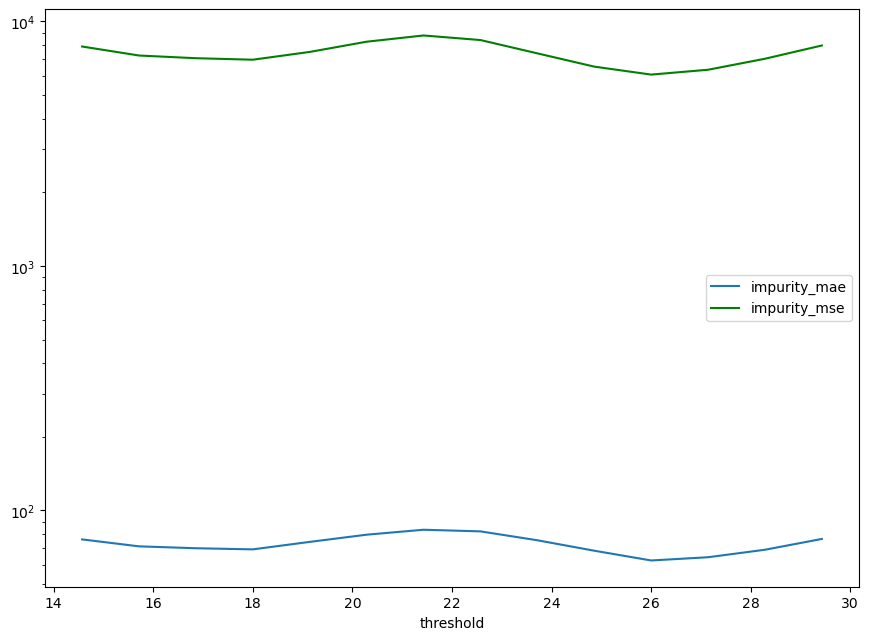

In [12]:
ax = mse_df.plot(x="threshold", y="impurity_mae",
                 figsize=(10.5, 7.5), logy=True)
mse_df.plot(x="threshold", y="impurity_mse", 
            ax=ax, c="green")

In [13]:
mse_df.nsmallest(n=1, columns="impurity_mae")

,threshold,n_left,n_right,mse_left,mse_right,mae_left,mae_right,impurity_mse,impurity_mae
10,26.0,11,4,8076.593666,530.887419,77.885426,19.752664,6064.405334,62.383356


In [14]:
import matplotlib.pyplot as plt

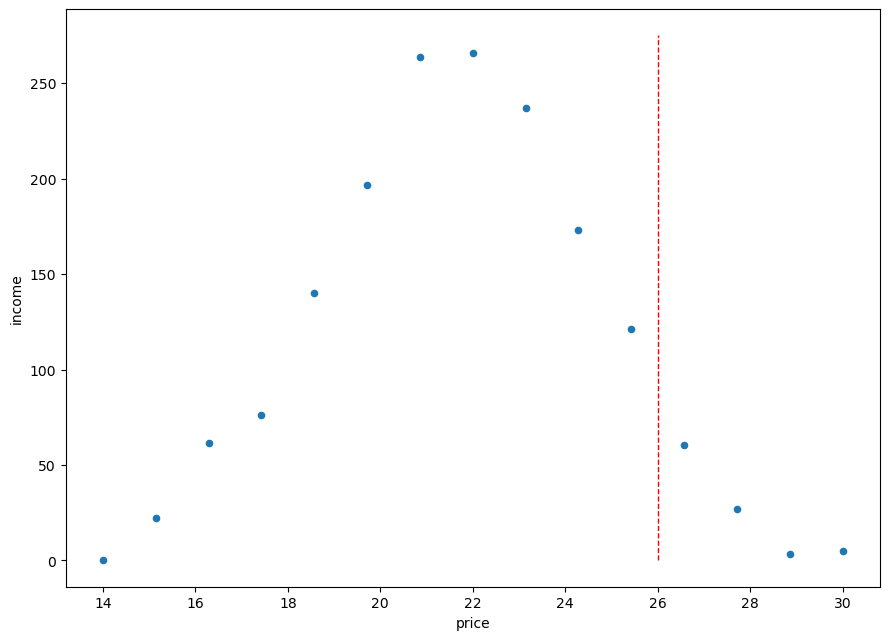

In [15]:
prices_df.plot.scatter(x="price", y="income", 
                       figsize=(10.5, 7.5))
plt.plot([26.0, 26.0], [0, 275], "r--", linewidth=1)

In [16]:
left_mean = prices_df[prices_df["price"] <= 26]["income"].mean()
right_mean = prices_df[prices_df["price"] > 26]["income"].mean()

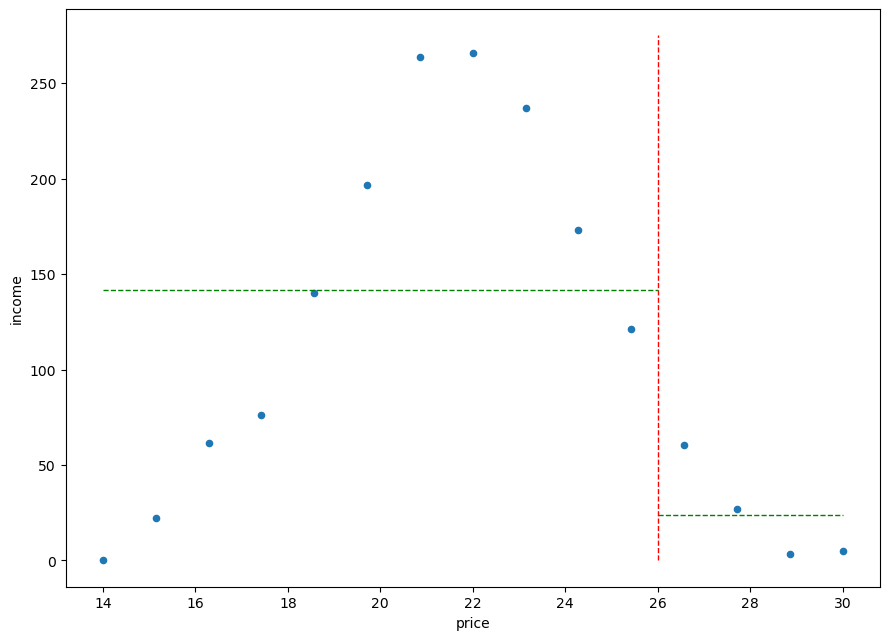

In [17]:
prices_df.plot.scatter(x="price", y="income", 
                       figsize=(10.5, 7.5))
plt.plot([26.0, 26.0], [0, 275], "r--", linewidth=1)
plt.plot([14.0, 26.0], [left_mean, left_mean], 
         "g--", linewidth=1)
plt.plot([26.0, 30.0], [right_mean, right_mean], 
         "g--", linewidth=1)

Uzyskaliśmy wynik MAE identyczny jak dla metryki MSE.